<a href="https://colab.research.google.com/github/rogerdox/inteligencia_artificial/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

nomes_colunas = ["Classe", "Alcool", "AcidoMalico", "Cinza", "AlcalinidadeCinza", "Magnesio", "FenoisTotais", "Flavanoides", "FenoisNaoFlavanoides", "Proantocianinas", "IntensidadeDeCor", "Matiz", "OD280/OD315", "Prolina"]
df = pd.read_csv(url, names=nomes_colunas)

display(df)


,Classe,Alcool,AcidoMalico,Cinza,AlcalinidadeCinza,Magnesio,FenoisTotais,Flavanoides,FenoisNaoFlavanoides,Proantocianinas,IntensidadeDeCor,Matiz,OD280/OD315,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
# Cria um objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajuste e aplique a transformação aos dados
df_normalizado = scaler.fit_transform(df)

# O resultado será uma matriz NumPy, você pode convertê-la novamente em um DataFrame se desejar
df_normalizado = pd.DataFrame(df_normalizado, columns=df.columns)

df_normalizado['Classe'] = df['Classe']

# Exiba o DataFrame normalizado
display(df_normalizado)



,Classe,Alcool,AcidoMalico,Cinza,AlcalinidadeCinza,Magnesio,FenoisTotais,Flavanoides,FenoisNaoFlavanoides,Proantocianinas,IntensidadeDeCor,Matiz,OD280/OD315,Prolina
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,3,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,3,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,3,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [ ]:
indices = np.random.permutation(df_normalizado.shape[0])
part = int(0.75 * len(indices))
treinamento_id, teste_id = indices[:part], indices[part:]

treinamento, teste = df_normalizado.loc[treinamento_id,:], df_normalizado.loc[teste_id,:]

y_d = treinamento['Classe']
y_t = teste['Classe']
del treinamento['Classe']
del teste['Classe']

display(treinamento)
display(teste)

,Alcool,AcidoMalico,Cinza,AlcalinidadeCinza,Magnesio,FenoisTotais,Flavanoides,FenoisNaoFlavanoides,Proantocianinas,IntensidadeDeCor,Matiz,OD280/OD315,Prolina
141,0.613158,0.359684,0.529412,0.484536,0.206522,0.144828,0.033755,0.452830,0.072555,0.368601,0.178862,0.439560,0.358060
34,0.652632,0.209486,0.689840,0.432990,0.434783,0.472414,0.462025,0.301887,0.356467,0.249147,0.504065,0.586081,0.582739
97,0.331579,0.132411,0.331551,0.278351,0.163043,0.541379,0.455696,0.301887,0.429022,0.138225,0.609756,0.538462,0.106990
100,0.276316,0.264822,0.181818,0.355670,0.293478,0.431034,0.386076,0.245283,0.312303,0.172355,0.642276,0.619048,0.308131
144,0.321053,0.620553,0.449198,0.407216,0.456522,0.137931,0.092827,0.301887,0.230284,0.591297,0.138211,0.267399,0.411555
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.815789,0.664032,0.737968,0.716495,0.282609,0.368966,0.088608,0.811321,0.296530,0.675768,0.105691,0.120879,0.201141
39,0.839474,0.642292,0.614973,0.134021,0.630435,0.696552,0.569620,0.132075,0.526814,0.325939,0.333333,0.827839,0.343795
98,0.352632,0.065217,0.395722,0.407216,0.195652,0.875862,0.719409,0.207547,0.485804,0.274744,0.455285,0.549451,0.272468
6,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826


,Alcool,AcidoMalico,Cinza,AlcalinidadeCinza,Magnesio,FenoisTotais,Flavanoides,FenoisNaoFlavanoides,Proantocianinas,IntensidadeDeCor,Matiz,OD280/OD315,Prolina
122,0.365789,0.729249,0.732620,0.819588,0.347826,0.420690,0.377637,0.566038,0.410095,0.068259,0.357724,0.677656,0.062054
119,0.255263,0.531621,0.342246,0.432990,0.184783,0.351724,0.274262,0.452830,0.460568,0.000000,0.365854,0.652015,0.203994
102,0.344737,0.337945,0.588235,0.536082,0.304348,0.544828,0.373418,0.396226,0.283912,0.129693,0.260163,0.772894,0.114123
27,0.597368,0.193676,0.417112,0.329897,0.260870,0.489655,0.390295,0.264151,0.296530,0.227816,0.439024,0.549451,0.718260
137,0.394737,0.942688,0.684492,0.742268,0.282609,0.279310,0.054852,0.943396,0.217666,0.317406,0.276423,0.153846,0.169044
66,0.547368,0.053360,0.181818,0.226804,0.086957,0.689655,0.599156,0.245283,0.589905,0.343003,0.520325,0.699634,0.159772
43,0.581579,0.640316,0.497326,0.355670,0.358696,0.572414,0.483122,0.358491,0.394322,0.262799,0.276423,0.633700,0.286733
150,0.650000,0.470356,0.673797,0.690722,0.576087,0.144828,0.259494,0.169811,0.264984,0.624573,0.089431,0.010989,0.158345
35,0.644737,0.211462,0.561497,0.510309,0.326087,0.593103,0.556962,0.245283,0.457413,0.325939,0.455285,0.805861,0.457917
147,0.484211,0.764822,0.598930,0.561856,0.173913,0.248276,0.065401,0.641509,0.141956,0.543515,0.048780,0.216117,0.247504


0.9777777777777777


Text(0.5, 1.0, 'Matriz de Confusão')

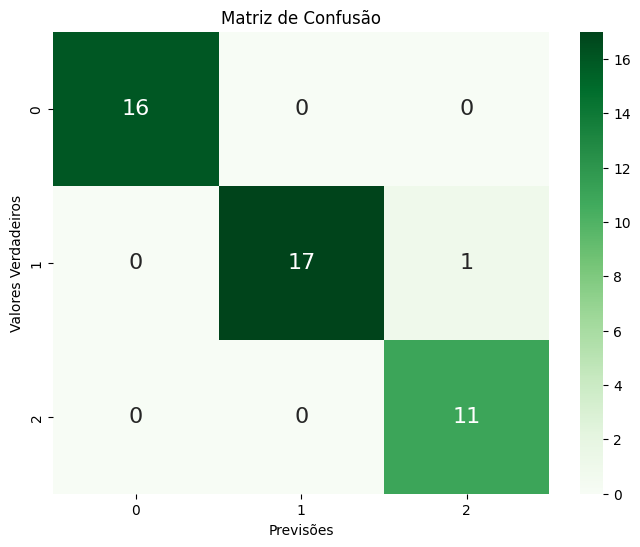

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def knn(X_train, y_train, X_test, k):

    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    return y_pred

resultado = knn(treinamento, y_d, teste, 3)
roger = confusion_matrix(y_t, resultado)
taxa_c = accuracy_score(y_t, resultado)

print(taxa_c)

plt.figure(figsize=(8, 6))
sns.heatmap(roger, annot=True, fmt='d', cmap='Greens', annot_kws={"size": 16})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')